In [74]:
from functions.kinetic_mechanisms.KineticMechanisms import *
from functions.kinetic_mechanisms.KineticModifiers import *
from functions.kinetic_mechanisms.KineticMechanismsCustom import *
import numpy as np
import torch
from torch import nn
from torchdiffeq import odeint_adjoint 
import time
import pandas as pd

In [75]:
parameter_dict = {'k1': .35e0,'k2': .266e2,'k3': .123e5,'k4': .86e-3,'k5': .82e-3,'k6': .15e5,'k7': .13e-3,
           'k8': .24e5,'k9': .165e5,'k10': .9e4,'k11': .22e-1,'k12': .12e5,'k13': .188e1,'k14': .163e5,'k15': .48e7,
           'k16': .35e-3,'k17': .175e-1,'k18': .1e9,'k19': .444e12,'k20': .124e4,'k21': .21e1,
           'k22': .578e1,'k23': .474e-1,'k24': .178e4,'k25': .312e1}



def create_fluxes(parameter_dict):
    r1=Torch_MA_Irrev(k_fwd=parameter_dict['k1'],to_be_learned=[True])
    r2=Torch_MA_Irrev(k_fwd=parameter_dict['k2'],to_be_learned=[True])
    r3=Torch_MA_Irrev(k_fwd=parameter_dict['k3'],to_be_learned=[True])
    # r=Torch_MA_Irrev_multiple_substrates(k_fwd=parameter_dict['k2'],to_be_learned=[True])
    r4=Torch_MA_Irrev(k_fwd=parameter_dict['k4'],to_be_learned=[True])
    r5=Torch_MA_Irrev(k_fwd=parameter_dict['k5'],to_be_learned=[True])
    r6=Torch_MA_Irrev(k_fwd=parameter_dict['k6'],to_be_learned=[True])
    r7=Torch_MA_Irrev(k_fwd=parameter_dict['k7'],to_be_learned=[True])
    r8=Torch_MA_Irrev(k_fwd=parameter_dict['k8'],to_be_learned=[True])
    r9=Torch_MA_Irrev(k_fwd=parameter_dict['k9'],to_be_learned=[True])
    r10=Torch_MA_Irrev(k_fwd=parameter_dict['k10'],to_be_learned=[True])
    r11=Torch_MA_Irrev(k_fwd=parameter_dict['k11'],to_be_learned=[True])
    r12=Torch_MA_Irrev(k_fwd=parameter_dict['k12'],to_be_learned=[True])
    r13=Torch_MA_Irrev(k_fwd=parameter_dict['k13'],to_be_learned=[True])
    r14=Torch_MA_Irrev(k_fwd=parameter_dict['k14'],to_be_learned=[True])
    r15=Torch_MA_Irrev(k_fwd=parameter_dict['k15'],to_be_learned=[True])
    r16=Torch_MA_Irrev(k_fwd=parameter_dict['k16'],to_be_learned=[True])
    r17=Torch_MA_Irrev(k_fwd=parameter_dict['k17'],to_be_learned=[True])
    r18=Torch_MA_Irrev(k_fwd=parameter_dict['k18'],to_be_learned=[True])
    r19=Torch_MA_Irrev(k_fwd=parameter_dict['k19'],to_be_learned=[True])
    r20=Torch_MA_Irrev(k_fwd=parameter_dict['k20'],to_be_learned=[True])
    r21=Torch_MA_Irrev(k_fwd=parameter_dict['k21'],to_be_learned=[True])
    r22=Torch_MA_Irrev(k_fwd=parameter_dict['k22'],to_be_learned=[True])
    r23=Torch_MA_Irrev(k_fwd=parameter_dict['k23'],to_be_learned=[True])
    r24=Torch_MA_Irrev(k_fwd=parameter_dict['k24'],to_be_learned=[True])
    r25=Torch_MA_Irrev(k_fwd=parameter_dict['k25'],to_be_learned=[True])
    v={"r1":r1,"r2":r2,"r3":r3,"r4":r4,"r5":r5,"r6":r6,
       "r7":r7,"r8":r8,"r9":r9,"r10":r10,"r11":r11,"r12":r12,
       "r13":r13,"r14":r14,"r15":r15,"r16":r16,"r17":r17,"r18":r18,
       "r19":r19,"r20":r20,"r21":r21,"r22":r22,"r23":r23,"r24":r24,"r25":r25}
    return v

In [76]:
fluxes=create_fluxes(parameter_dict=parameter_dict)

#metabolites=
metabolite_names=["y_"+str(i+1) for i in range(21)]
indices=np.arange(0,20,1)
metabolite_names=dict(zip(metabolite_names,indices))
metabolite_names

{'y_1': 0,
 'y_2': 1,
 'y_3': 2,
 'y_4': 3,
 'y_5': 4,
 'y_6': 5,
 'y_7': 6,
 'y_8': 7,
 'y_9': 8,
 'y_10': 9,
 'y_11': 10,
 'y_12': 11,
 'y_13': 12,
 'y_14': 13,
 'y_15': 14,
 'y_16': 15,
 'y_17': 16,
 'y_18': 17,
 'y_19': 18,
 'y_20': 19}

In [77]:



 
    # r1  = k1 * y[1]
    # r2  = k2 * y[2] * y[4]
    # r3  = k3 * y[5] * y[2]
    # r4  = k4 * y[7]
    # r5  = k5 * y[7]
    # r6  = k6 * y[7] * y[6]
    # r7  = k7 * y[9]
    # r8  = k8 * y[9] * y[6]
    # r9  = k9 * y[11] * y[2]
    # r10 = k10 * y[11] * y[1]
    # r11 = k11 * y[13]
    # r12 = k12 * y[10] * y[2]
    # r13 = k13 * y[14]
    # r14 = k14 * y[1] * y[6]
    # r15 = k15 * y[3]
    # r16 = k16 * y[4]
    # r17 = k17 * y[4]
    # r18 = k18 * y[16]
    # r19 = k19 * y[16]
    # r20 = k20 * y[17] * y[6]
    # r21 = k21 * y[19]
    # r22 = k22 * y[19]
    # r23 = k23 * y[1] * y[4]
    # r24 = k24 * y[19] * y[1]
    # r25 = k25 * y[20]


In [78]:

class Pollu_Model(torch.nn.Module):
    def __init__(self,fluxes,metabolites):
        super(Pollu_Model,self).__init__()
        self.fluxes=nn.ParameterDict(fluxes)
        self.metabolites=metabolites
        self.scale=torch.ones(len(metabolites))
        

    def calculate_fluxes(self,concentrations):
        self.fluxes['r1'].value=self.fluxes['r1'].calculate(concentrations[self.metabolites['y_1']])
        self.fluxes['r2'].value=self.fluxes['r2'].calculate(concentrations[self.metabolites['y_2']]*concentrations[self.metabolites['y_4']])
        self.fluxes['r3'].value=self.fluxes['r3'].calculate(concentrations[self.metabolites['y_5']]*concentrations[self.metabolites['y_2']])
        self.fluxes['r4'].value=self.fluxes['r4'].calculate(concentrations[self.metabolites['y_7']])
        self.fluxes['r5'].value=self.fluxes['r5'].calculate(concentrations[self.metabolites['y_7']])

        self.fluxes['r6'].value=self.fluxes['r6'].calculate(concentrations[self.metabolites['y_7']]*concentrations[self.metabolites['y_6']])
        self.fluxes['r7'].value=self.fluxes['r7'].calculate(concentrations[self.metabolites['y_9']])
        self.fluxes['r8'].value=self.fluxes['r8'].calculate(concentrations[self.metabolites['y_9']]*concentrations[self.metabolites['y_6']])
        self.fluxes['r9'].value=self.fluxes['r9'].calculate(concentrations[self.metabolites['y_11']]*concentrations[self.metabolites['y_2']])
        self.fluxes['r10'].value=self.fluxes['r10'].calculate(concentrations[self.metabolites['y_11']]*concentrations[self.metabolites['y_1']])

        self.fluxes['r11'].value=self.fluxes['r11'].calculate(concentrations[self.metabolites['y_13']])
        self.fluxes['r12'].value=self.fluxes['r12'].calculate(concentrations[self.metabolites['y_10']]*concentrations[self.metabolites['y_2']])
        self.fluxes['r13'].value=self.fluxes['r13'].calculate(concentrations[self.metabolites['y_14']])
        self.fluxes['r14'].value=self.fluxes['r14'].calculate(concentrations[self.metabolites['y_1']]*concentrations[self.metabolites['y_6']])
        self.fluxes['r15'].value=self.fluxes['r15'].calculate(concentrations[self.metabolites['y_3']])

        self.fluxes['r16'].value=self.fluxes['r16'].calculate(concentrations[self.metabolites['y_4']])     
   
        self.fluxes['r17'].value=self.fluxes['r17'].calculate(concentrations[self.metabolites['y_4']])
        self.fluxes['r18'].value=self.fluxes['r18'].calculate(concentrations[self.metabolites['y_16']])
        self.fluxes['r19'].value=self.fluxes['r19'].calculate(concentrations[self.metabolites['y_16']])
        
        self.fluxes['r20'].value=self.fluxes['r20'].calculate(concentrations[self.metabolites['y_17']]*concentrations[self.metabolites['y_6']])
        self.fluxes['r21'].value=self.fluxes['r21'].calculate(concentrations[self.metabolites['y_19']])
        self.fluxes['r22'].value=self.fluxes['r22'].calculate(concentrations[self.metabolites['y_19']])
        self.fluxes['r23'].value=self.fluxes['r23'].calculate(concentrations[self.metabolites['y_1']]*concentrations[self.metabolites['y_4']])
        self.fluxes['r24'].value=self.fluxes['r24'].calculate(concentrations[self.metabolites['y_19']]*concentrations[self.metabolites['y_1']])
        self.fluxes['r25'].value=self.fluxes['r25'].calculate(concentrations[self.metabolites['y_20']])

    def forward(self,_,conc_in):
        self.calculate_fluxes(conc_in)
        dy=torch.zeros_like(conc_in)
        
        dy[0]  = -self.fluxes['r1'].value - self.fluxes['r10'].value - self.fluxes['r14'].value - self.fluxes['r23'].value - self.fluxes['r24'].value + self.fluxes['r2'].value + self.fluxes['r3'].value + self.fluxes['r9'].value + self.fluxes['r11'].value + self.fluxes['r12'].value + self.fluxes['r22'].value + self.fluxes['r25'].value
        dy[1]  = -self.fluxes['r2'].value - self.fluxes['r3'].value - self.fluxes['r9'].value - self.fluxes['r12'].value + self.fluxes['r1'].value + self.fluxes['r21'].value
        dy[2]  = -self.fluxes['r15'].value + self.fluxes['r1'].value + self.fluxes['r17'].value + self.fluxes['r19'].value + self.fluxes['r22'].value
        dy[3]  = -self.fluxes['r2'].value - self.fluxes['r16'].value - self.fluxes['r17'].value - self.fluxes['r23'].value + self.fluxes['r15'].value
        dy[4]  = -self.fluxes['r3'].value + self.fluxes['r4'].value + self.fluxes['r4'].value + self.fluxes['r6'].value + self.fluxes['r7'].value + self.fluxes['r13'].value + self.fluxes['r20'].value
        dy[5]  = -self.fluxes['r6'].value - self.fluxes['r8'].value - self.fluxes['r14'].value - self.fluxes['r20'].value + self.fluxes['r3'].value + self.fluxes['r18'].value + self.fluxes['r18'].value
        dy[6]  = -self.fluxes['r4'].value - self.fluxes['r5'].value - self.fluxes['r6'].value + self.fluxes['r13'].value
        dy[7]  = self.fluxes['r4'].value + self.fluxes['r5'].value + self.fluxes['r6'].value + self.fluxes['r7'].value
        dy[8]  = -self.fluxes['r7'].value - self.fluxes['r8'].value
        dy[9]  = -self.fluxes['r12'].value + self.fluxes['r7'].value + self.fluxes['r9'].value
        dy[10] = -self.fluxes['r9'].value - self.fluxes['r10'].value + self.fluxes['r8'].value + self.fluxes['r11'].value
        dy[11] = self.fluxes['r9'].value
        dy[12] = -self.fluxes['r11'].value + self.fluxes['r10'].value
        dy[13] = -self.fluxes['r13'].value + self.fluxes['r12'].value
        dy[14] = self.fluxes['r14'].value
        dy[15] = -self.fluxes['r18'].value - self.fluxes['r19'].value + self.fluxes['r16'].value
        dy[16] = -self.fluxes['r20'].value
        dy[17] = self.fluxes['r20'].value
        dy[18] = -self.fluxes['r21'].value - self.fluxes['r22'].value - self.fluxes['r24'].value + self.fluxes['r23'].value + self.fluxes['r25'].value
        dy[19] = -self.fluxes['r25'].value + self.fluxes['r24'].value
        dy=dy*self.scale

        # print(dy.shape)
        #If I get detach problems: dXdt=torch.cat([LACT,ACT,PYR,X],dim=0)
        return dy





In [79]:
y0=torch.zeros(20)
y0[1]  = 0.2
y0[3]  = 0.04
y0[6]  = 0.1
y0[7]  = 0.3
y0[8]  = 0.01
y0[16] = 0.007


In [65]:
%%timeit
ode.calculate_fluxes(y0)

212 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


{}


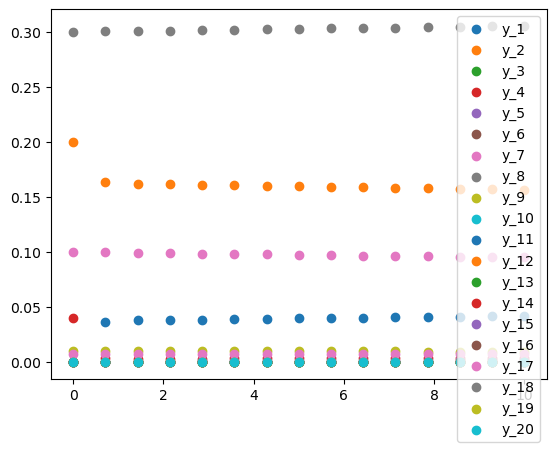

In [80]:
ode=Pollu_Model(fluxes=fluxes,metabolites=metabolite_names)

tensor_timepoints=torch.linspace(0,10,15)
a=time.time()
sol=odeint(ode,y0=y0,t=tensor_timepoints,method="cvode")
# tensor_timepoints=torch.linspace(0,0.6,1000)
for i in range(len(y0)):
    plt.scatter(tensor_timepoints.detach().numpy(),sol.detach().numpy()[:,i],label=list(metabolite_names.keys())[i])
# plt.yscale("log")
plt.legend()
plt.show()




In [82]:
sol.shape

torch.Size([15, 20])

In [83]:
rawdata=pd.DataFrame(sol.detach().numpy().T,index=metabolite_names.keys(),columns=list(tensor_timepoints.detach().numpy()))

In [85]:
rawdata.to_csv("rawdata_POLLU_model.csv")


In [84]:
rawdata

,0.000000,0.714286,1.428571,2.142857,2.857143,3.571429,4.285714,5.000000,5.714286,6.428571,7.142857,7.857143,8.571428,9.285714,10.000000
y_1,0.000,3.641571e-02,3.777207e-02,3.816647e-02,3.852577e-02,3.888313e-02,3.923173e-02,3.957430e-02,3.991200e-02,4.024864e-02,4.057872e-02,4.090080e-02,4.122039e-02,4.153998e-02,4.185957e-02
y_2,0.200,1.634734e-01,1.619926e-01,1.614727e-01,1.609878e-01,1.605049e-01,1.600316e-01,1.595651e-01,1.591040e-01,1.586442e-01,1.581915e-01,1.577477e-01,1.573067e-01,1.568656e-01,1.564246e-01
y_3,0.000,2.671712e-09,2.765939e-09,2.795029e-09,2.821260e-09,2.847119e-09,2.873316e-09,2.898514e-09,2.923273e-09,2.947865e-09,2.972210e-09,2.995870e-09,3.019377e-09,3.042702e-09,3.065860e-09
y_4,0.040,4.050503e-03,3.092779e-03,3.098020e-03,3.135419e-03,3.173739e-03,3.212566e-03,3.250366e-03,3.287816e-03,3.325132e-03,3.362440e-03,3.398901e-03,3.435211e-03,3.471521e-03,3.507831e-03
y_5,0.000,3.085051e-07,3.140062e-07,3.143791e-07,3.129411e-07,3.114883e-07,3.076827e-07,3.047797e-07,3.019959e-07,2.992365e-07,2.967445e-07,2.943015e-07,2.918230e-07,2.893480e-07,2.868638e-07
y_6,0.000,2.657234e-07,2.662384e-07,2.657088e-07,2.638434e-07,2.620847e-07,2.579384e-07,2.548341e-07,2.518519e-07,2.489170e-07,2.461831e-07,2.435459e-07,2.408688e-07,2.381924e-07,2.355108e-07
y_7,0.100,9.956951e-02,9.920502e-02,9.884396e-02,9.848592e-02,9.812868e-02,9.777794e-02,9.743195e-02,9.708949e-02,9.674786e-02,9.641061e-02,9.607925e-02,9.574969e-02,9.542014e-02,9.509059e-02
y_8,0.300,3.004561e-01,3.008591e-01,3.012613e-01,3.016609e-01,3.020597e-01,3.024516e-01,3.028379e-01,3.032201e-01,3.036013e-01,3.039774e-01,3.043467e-01,3.047140e-01,3.050812e-01,3.054484e-01
y_9,0.010,9.945440e-03,9.899337e-03,9.853352e-03,9.807756e-03,9.762280e-03,9.717880e-03,9.674337e-03,9.631431e-03,9.588672e-03,9.546694e-03,9.505757e-03,9.465137e-03,9.424518e-03,9.383897e-03
y_10,0.000,2.952492e-08,2.962277e-08,2.952691e-08,2.942147e-08,2.952259e-08,2.857804e-08,2.821277e-08,2.793377e-08,2.777510e-08,2.718685e-08,2.688811e-08,2.674022e-08,2.656134e-08,2.644968e-08
